# Batch Gradient Descent, Stochastic Gradient Descent, and Mini Batch Gradient Descent 


Gradient descent is a first-order iterative optimization algorithm for finding the minimum of a function

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('../datasets/homeprices_banglore.csv')

In [14]:
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [42]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

X_scaled = sx.fit_transform(df.drop('price', axis=1))
y_scaled = sy.fit_transform(df['price'].values.reshape(len(df.price), 1))

In [43]:
X_scaled, y_scaled

(array([[0.08827586, 0.25      ],
        [0.62068966, 0.75      ],
        [0.22068966, 0.5       ],
        [0.24862069, 0.5       ],
        [0.13793103, 0.25      ],
        [0.12758621, 0.25      ],
        [0.6662069 , 0.75      ],
        [0.86206897, 0.75      ],
        [0.17586207, 0.5       ],
        [1.        , 1.        ],
        [0.34482759, 0.5       ],
        [0.68448276, 0.75      ],
        [0.06896552, 0.25      ],
        [0.10344828, 0.25      ],
        [0.5       , 0.5       ],
        [0.12931034, 0.25      ],
        [0.13103448, 0.5       ],
        [0.25517241, 0.5       ],
        [0.67931034, 0.5       ],
        [0.        , 0.        ]]),
 array([[0.05237037],
        [0.65185185],
        [0.22222222],
        [0.31851852],
        [0.14074074],
        [0.04444444],
        [0.76296296],
        [0.91111111],
        [0.13333333],
        [1.        ],
        [0.37037037],
        [0.8       ],
        [0.04444444],
        [0.05925926],
        [0

## 2. Batch Gradient Descent


In Batch Gradient Descent, all the training data is taken into consideration to take a single step. We take the average of the gradients of all the training examples and then use that mean gradient to update our parameters. So that’s just one step of gradient descent in one epoch.

In [52]:
def batch_grad(X, y_true, epochs, l_rate = 0.01):
    num_features = X.shape[1]
    w = np.ones(shape=num_features) # defining the weight
    bias = 0                        # defining the bias
    total_samples = X.shape[0]
    
    eph_arr, cost_arr = [], []
    
    for i in range(epochs):
        y_pred = np.dot(w, X.T) + bias
        
        w_grad = -(2/total_samples)*(X.T.dot(y_true - y_pred))
        b_grad = -(2/total_samples)*np.sum(y_true-y_pred)
        
        w = w - l_rate * w_grad
        bias = bias - l_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_pred)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_arr.append(cost)
            eph_arr.append(i)
        
    return w, bias, cost, cost_arr, eph_arr

In [54]:
w, b, cost, cost_list, epoch_list = batch_grad(X_scaled, y_scaled.reshape(y_scaled.shape[0],), 500)
w, b, cost 

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

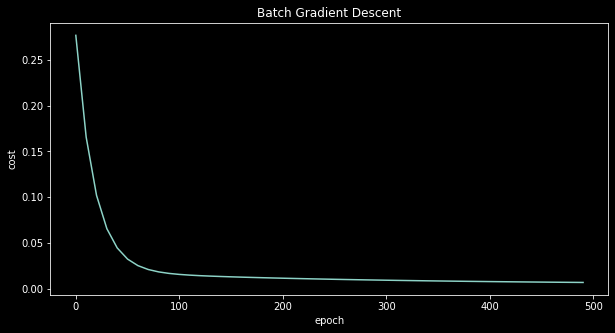

In [61]:
plt.style.use(['dark_background'])
plt.figure(figsize=(10, 5))

plt.title("Batch Gradient Descent")
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)    

## 2. Stochastic Gradient Descent

“Stochastic”, in plain terms means “random”